In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv("./2.1 diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [74]:
df.shape

(768, 9)

In [75]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

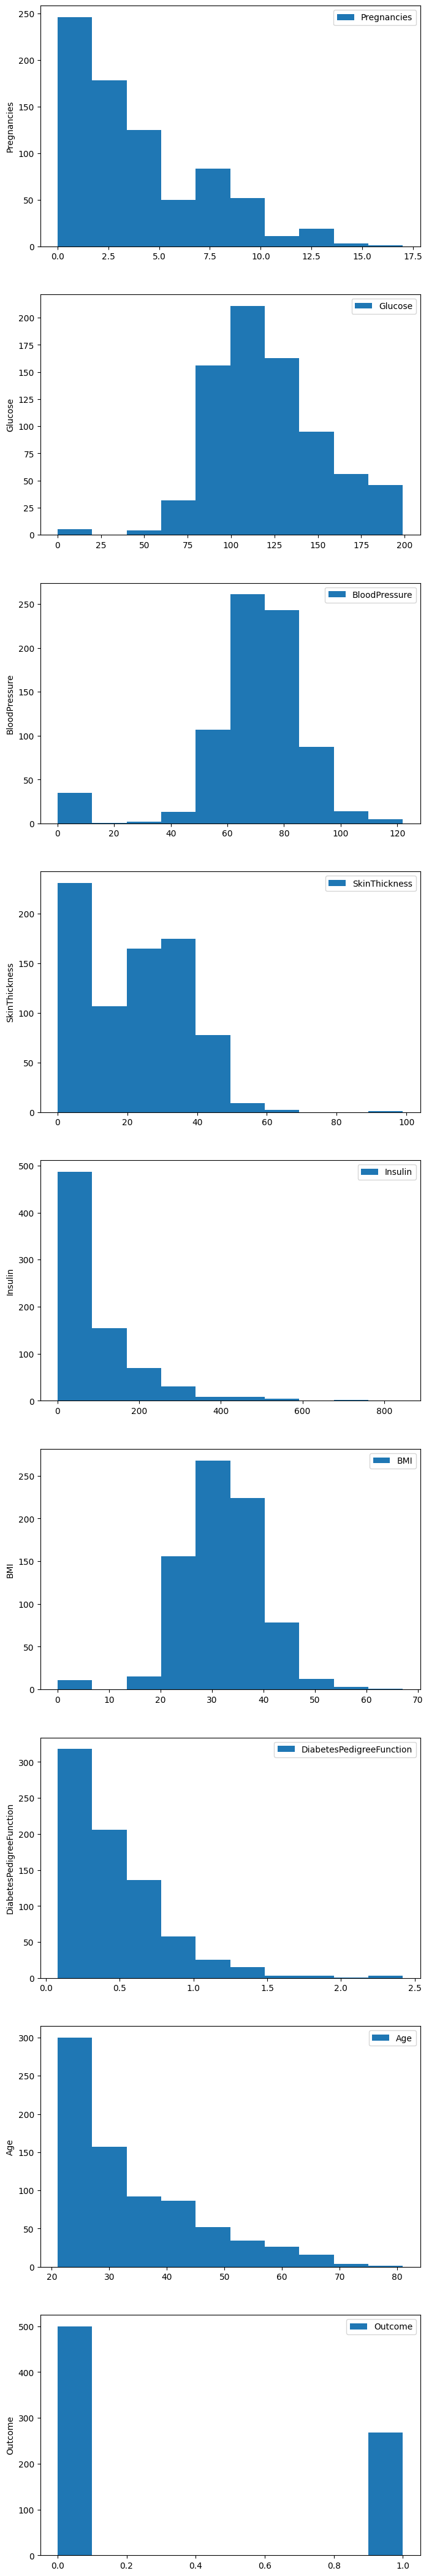

In [76]:
fig, axes = plt.subplots(nrows=len(df.columns), ncols=1, figsize=(8, 6 * len(df.columns)))

# Plot each column in a separate subplot
for i, column in enumerate(df.columns):
    axes[i].hist(df[column], label=column)
    axes[i].set_ylabel(column)
    axes[i].legend()

In [77]:
for col in df.columns:
    missing=df.loc[df[col]==0].shape[0]
    print(col+" : "+str(missing))

Pregnancies : 111
Glucose : 5
BloodPressure : 35
SkinThickness : 227
Insulin : 374
BMI : 11
DiabetesPedigreeFunction : 0
Age : 0
Outcome : 500


In [78]:
df["Glucose"]=df["Glucose"].replace(0,np.nan)
df["BloodPressure"]=df["BloodPressure"].replace(0,np.nan)
df["SkinThickness"]=df["SkinThickness"].replace(0,np.nan)
df["Insulin"]=df["Insulin"].replace(0,np.nan)
df["BMI"]=df["BMI"].replace(0,np.nan)

In [85]:
df.isnull().sum()
df.shape

(768, 9)

In [80]:
df["Glucose"].fillna(df["Glucose"].mean(),inplace=True)
df["BloodPressure"].fillna(df["BloodPressure"].mean(),inplace=True)
df["SkinThickness"].fillna(df["SkinThickness"].mean(),inplace=True)
df["Insulin"].fillna(df["Insulin"].mean(),inplace=True)
df["BMI"].fillna(df["BMI"].mean(),inplace=True)

In [81]:
from sklearn.preprocessing import StandardScaler

st=StandardScaler()
df_scaled=st.fit_transform(df)
df_scaled=pd.DataFrame(df_scaled,columns=df.columns)
df_scaled["Outcome"]=df["Outcome"]
df_scaled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.865108,-0.033518,6.655021e-01,-3.345079e-16,0.166292,0.468492,1.425995,1
1,-0.844885,-1.206162,-0.529859,-1.746338e-02,-3.345079e-16,-0.852531,-0.365061,-0.190672,0
2,1.233880,2.015813,-0.695306,8.087936e-16,-3.345079e-16,-1.332833,0.604397,-0.105584,1
3,-0.844885,-1.074652,-0.529859,-7.004289e-01,-7.243887e-01,-0.634212,-0.920763,-1.041549,0
4,-1.141852,0.503458,-2.680669,6.655021e-01,1.465506e-01,1.548980,5.484909,-0.020496,1
...,...,...,...,...,...,...,...,...,...
763,1.827813,-0.680125,0.297376,2.145261e+00,2.877840e-01,0.064409,-0.908682,2.532136,0
764,-0.547919,0.010298,-0.198965,-2.451185e-01,-3.345079e-16,0.632039,-0.398282,-0.531023,0
765,0.342981,-0.022579,-0.033518,-7.004289e-01,-5.125386e-01,-0.910750,-0.685193,-0.275760,0
766,-0.844885,0.141808,-1.026200,8.087936e-16,-3.345079e-16,-0.343120,-0.371101,1.170732,1


In [23]:
# a=df.loc[df["BloodPressure"]==0]

# df.drop(a.index,inplace=True)
# a=df.loc[df["BMI"]==0]

# df.drop(a.index,inplace=True)
# a=df.loc[df["Glucose"]==0]

# df.drop(a.index,inplace=True)
# a=df.loc[df["SkinThickness"]==0]

# df.drop(a.index,inplace=True)

In [86]:
x=df_scaled.drop("Outcome",axis=1)
y=df_scaled["Outcome"]

In [89]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)



In [90]:
x_train.shape

(614, 8)

In [92]:
y_test.shape

(154,)

In [93]:
154+614

768

In [132]:
from keras.layers import Dense,Dropout,Flatten,LSTM,BatchNormalization,SimpleRNN
from keras.models import Model,Sequential


model=Sequential()
model.add(Dense(128,activation="relu",input_dim=8))
model.add(Dropout(0.2))

# model.add(LSTM(units=10))
model.add(Dense(32,activation="elu"))
# model.add(BatchNormalization())

# model.add(SimpleRNN())
model.add(Dropout(0.2))
# model.add(Dropout(0.2))
model.add(Dense(1,activation="sigmoid"))

In [133]:
model.compile("adam",loss="binary_crossentropy",metrics=["accuracy"])

In [134]:
hist=model.fit(x_train,y_train,epochs=200,validation_data=(x_test,y_test))

Epoch 1/200
20/20 [==============================] - 1s 13ms/step - loss: 0.5773 - accuracy: 0.6889 - val_loss: 0.5021 - val_accuracy: 0.7338
Epoch 2/200
20/20 [==============================] - 0s 5ms/step - loss: 0.4958 - accuracy: 0.7508 - val_loss: 0.4860 - val_accuracy: 0.7403
Epoch 3/200
20/20 [==============================] - 0s 5ms/step - loss: 0.4640 - accuracy: 0.7785 - val_loss: 0.4728 - val_accuracy: 0.7403
Epoch 4/200
20/20 [==============================] - 0s 5ms/step - loss: 0.4669 - accuracy: 0.7622 - val_loss: 0.4701 - val_accuracy: 0.7532
Epoch 5/200
20/20 [==============================] - 0s 5ms/step - loss: 0.4629 - accuracy: 0.7736 - val_loss: 0.4733 - val_accuracy: 0.7662
Epoch 6/200
20/20 [==============================] - 0s 5ms/step - loss: 0.4471 - accuracy: 0.7785 - val_loss: 0.4674 - val_accuracy: 0.7597
Epoch 7/200
20/20 [==============================] - 0s 5ms/step - loss: 0.4519 - accuracy: 0.7785 - val_loss: 0.4692 - val_accuracy: 0.7662
Epoch 8/200


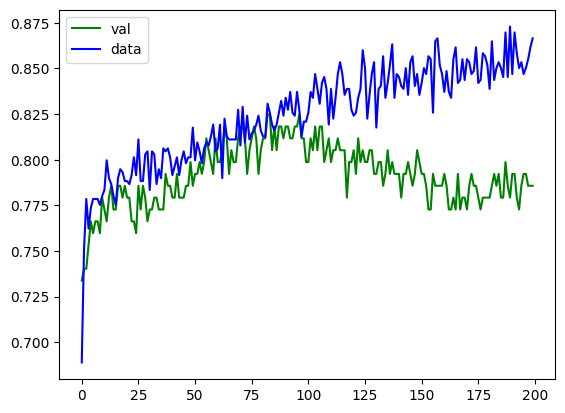

In [135]:
plt.plot(hist.history["val_accuracy"],color="green",label="val")
plt.plot(hist.history["accuracy"],color="blue",label="data")
plt.legend()

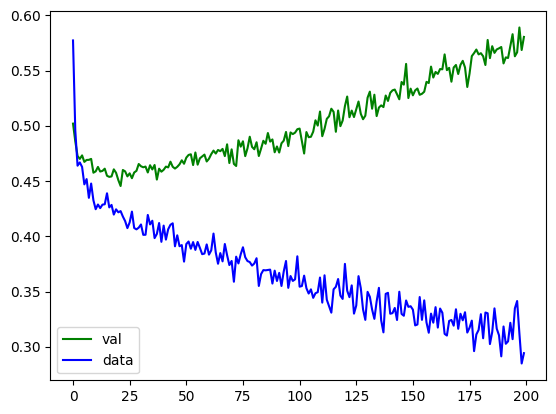

In [136]:
plt.plot(hist.history["val_loss"],color="green",label="val")
plt.plot(hist.history["loss"],color="blue",label="data")
plt.legend()

In [47]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import numpy as np

param = {"C": np.arange(0.1, 5, 0.5), "gamma": np.arange(1, 10, 2), "kernel": ["linear", "rbf"]}
svm = SVC(verbose=1)

g = GridSearchCV(svm, param)  # You can specify the number of folds in cv cv=5 ...

g.fit(x_train, y_train)

best_model = g.best_estimator_
best_score=g.best_score_

ypred = best_model.predict(x_test)
test_accuracy = accuracy_score(y_test, ypred)

print("Best Accuracy (from cross-validation):", g.best_score_)
print("Accuracy on Test Set:", test_accuracy)


[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

KeyboardInterrupt: 